<a href="https://colab.research.google.com/github/Maedeabm/Stroke-Prediction-Odyssey-From-Classic-Classifiers-to-Transformers/blob/main/Stroke_Prediction_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest classifier for stroke prediction:

1. Data Loading

Explanation:

We first import the necessary library, pandas, to help us load and manipulate data.

We then read our dataset and store it in the data variable.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('stroke_dataset.csv')


2. Data Preprocessing

Missing values can affect the performance of the model. So, we simply drop them for this example.

We use One-Hot Encoding to convert categorical data into a format that can be provided to ML algorithms.

We then split our data into training and test sets using train_test_split to evaluate our model's performance later.

In [ ]:
# Handling missing values (assuming missing values for simplicity)
data.dropna(inplace=True)

# One-Hot Encoding for categorical variables
data = pd.get_dummies(data, drop_first=True)

# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

X = data.drop('stroke', axis=1)  # Assuming 'stroke' is the target column
y = data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Model Training

We import the RandomForestClassifier from sklearn.

We then initialize the classifier and fit (or train) it on our training data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



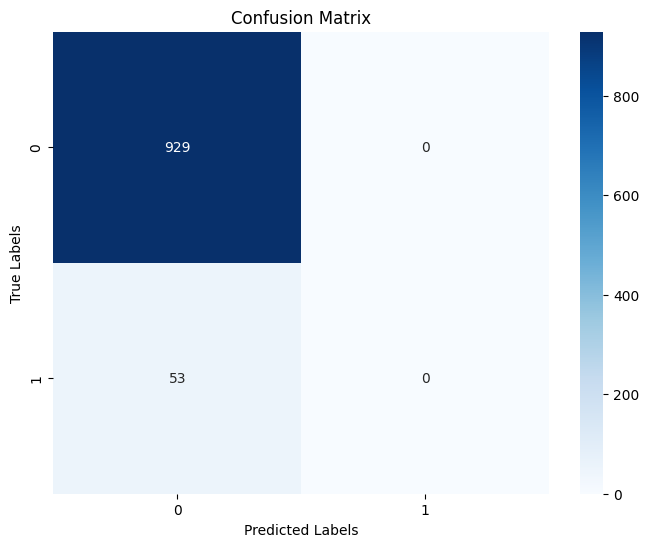

Accuracy: 0.9460285132382892


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = rf.predict(X_test)

# Print classification report for precision, recall, f1-score, and accuracy
print(classification_report(y_test, y_pred))

# Confusion Matrix visualization
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


4. Model Evaluation

After training, we use our model to make predictions on the test set.

The classification_report provides a detailed breakdown of the model's performance in terms of precision, recall, f1-score, and support.

We visualize the confusion matrix using seaborn to provide a clear picture of True Positives, True Negatives, False Positives, and False Negatives.

Finally, we print the overall accuracy of the model.

5. Feature Importance

Random Forest provides a handy attribute to check feature importances, which can be crucial for understanding the data and making improvements:

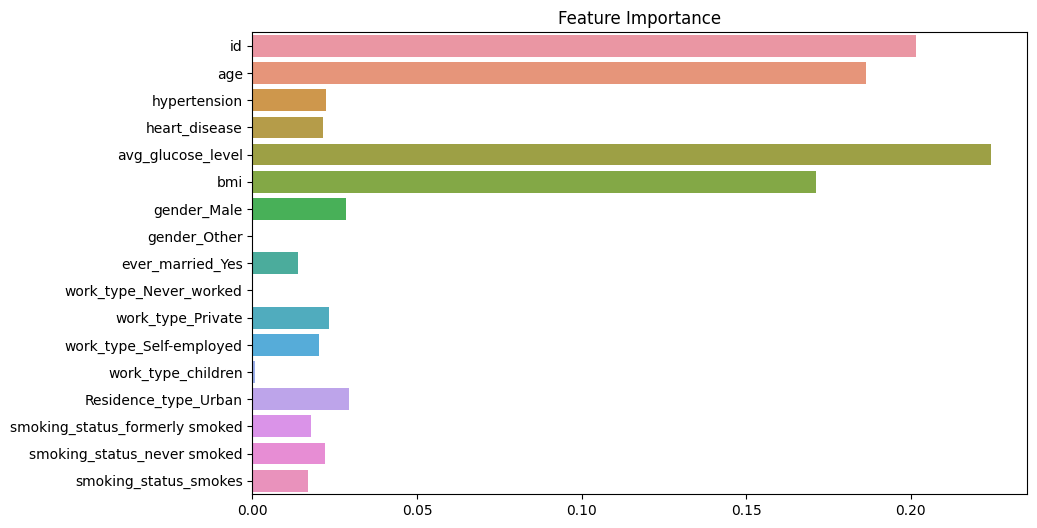

In [ ]:
# Feature importance
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()

Random Forest has an inherent ability to provide importance scores for features. Features with higher scores are more influential in making decisions.

We visualize these scores using a bar plot to get a clear understanding of which features are most significant in the prediction process.

Now, you can run the code, and it should work on the stroke dataset to predict the occurrence of strokes using a Random Forest classifier. You can also tweak hyperparameters of the Random Forest classifier to optimize the model further.

Along with the metrics we already discussed, let's incorporate the following:

ROC Curve and AUC (Area Under the Curve): This will help in assessing the performance of our classifier in terms of its discrimination capacity.

Log Loss: It provides a measure of uncertainty. It penalizes wrong predictions heavily.

Matthews Correlation Coefficient (MCC): It provides a balanced metric even for imbalanced datasets.

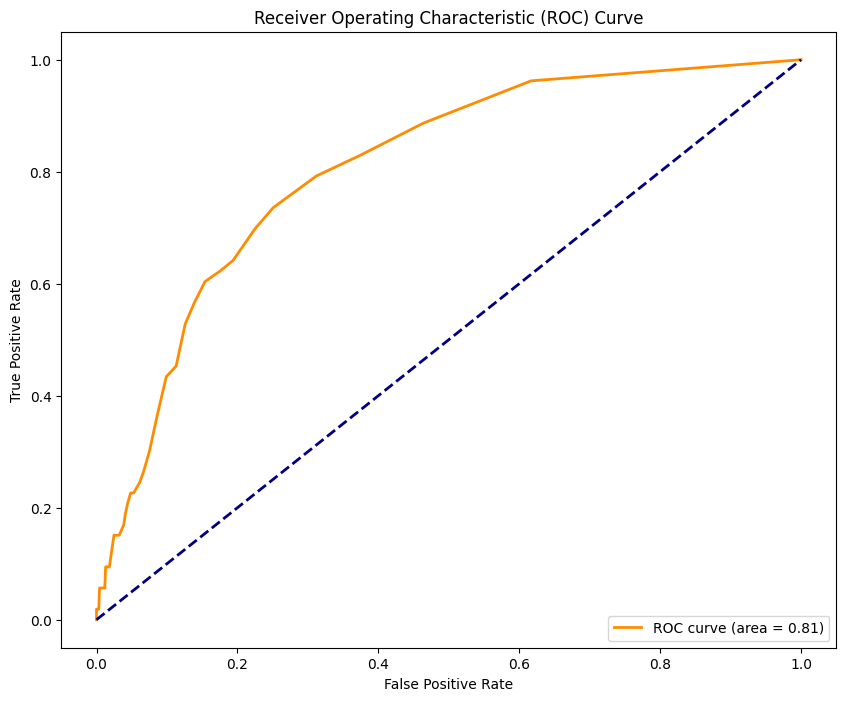

Log Loss: 0.24057734258511984
Matthews Correlation Coefficient (MCC): 0.0


In [ ]:
from sklearn.metrics import roc_curve, auc, log_loss, matthews_corrcoef

# ROC Curve and AUC
y_prob = rf.predict_proba(X_test)[:,1]  # probabilities for the positive outcome
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Log Loss
print("Log Loss:", log_loss(y_test, y_prob))

# Matthews Correlation Coefficient
print("Matthews Correlation Coefficient (MCC):", matthews_corrcoef(y_test, y_pred))


    ROC Curve and AUC:
        The ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier. The true positive rate (TPR) is plotted against the false positive rate (FPR) for various threshold values.
        The AUC gives a single value metric that represents the likelihood that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one. An AUC of 1 means perfect classifier, while 0.5 denotes a poor classifier.

    Log Loss:
        Log Loss is a loss function used for binary classifiers. It quantifies the accuracy of the classifier by penalizing false classifications. A lower log loss indicates better performance with 0 representing a perfect log loss.

    Matthews Correlation Coefficient (MCC):
        MCC is a metric that takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. It ranges from -1 to 1, with 1 being perfect prediction, -1 being imperfect prediction, and 0 being random prediction.